In [ ]:
import tensorflow as tf
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfcc.T

In [ ]:
audio_files = ["/content/card1.wav","/content/card2.wav","/content/card3.wav","/content/card4.wav","/content/card5.wav", "/content/mock1.wav","/content/mock2.wav","/content/mock3.wav","/content/mock4.wav","/content/mock5.wav", "/content/robin1.wav", "/content/robin2.wav", "/content/robin3.wav", "/content/robin4.wav", "/content/robin5.wav", "/content/spar1.wav", "/content/spar2.wav", "/content/spar3.wav", "/content/spar4.wav", "/content/spar5.wav" , "/content/wren1.wav", "/content/wren2.wav", "/content/wren3.wav", "/content/wren4.wav", "/content/wren5.wav" ]
labels = ["cardinal","cardinal","cardinal","cardinal","cardinal", "mockingbird","mockingbird","mockingbird","mockingbird","mockingbird", "robin", "robin", "robin", "robin", "robin", "sparrow", "sparrow", "sparrow", "sparrow", "sparrow", "wren", "wren", "wren", "wren", "wren"]

In [ ]:
X = []
for file in audio_files:
    features = extract_features(file)
    X.append(features)

max_length = max(feature.shape[0] for feature in X)
X = [np.pad(feature, ((0, max_length - feature.shape[0]), (0, 0))) for feature in X]
X = np.array(X)

y = np.array(labels)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2000 - loss: 1.5980 - val_accuracy: 0.2000 - val_loss: 1.6376 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.2500 - loss: 1.5175 - val_accuracy: 0.4000 - val_loss: 1.5491 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4500 - loss: 1.3552 - val_accuracy: 0.4000 - val_loss: 1.4561 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.5500 - loss: 1.2417 - val_accuracy: 0.0000e+00 - val_loss: 1.3941 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5500 - loss: 1.2324 - val_accuracy: 0.2000 - val_loss: 1.3495 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7000 - loss: 0.8964 - val_accuracy: 0.4000 - val_loss: 1.3241 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.7500 - loss: 0.7007 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


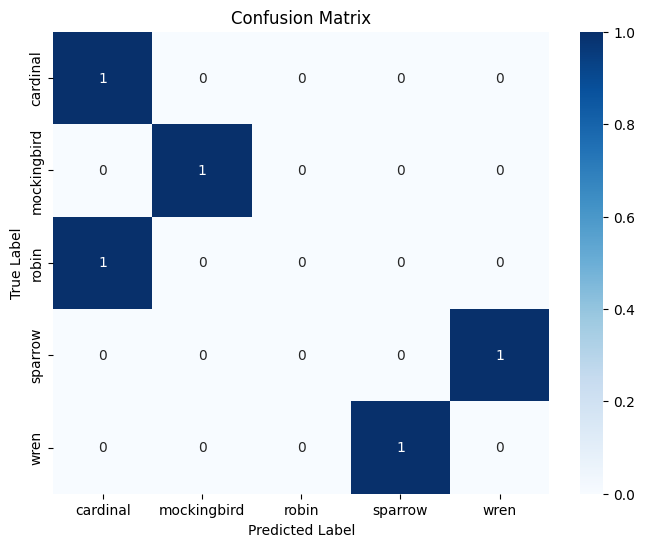

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

    cardinal       0.50      1.00      0.67         1
 mockingbird       1.00      1.00      1.00         1
       robin       0.00      0.00      0.00         1
     sparrow       0.00      0.00      0.00         1
        wren       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.30      0.40      0.33         5
weighted avg       0.30      0.40      0.33         5



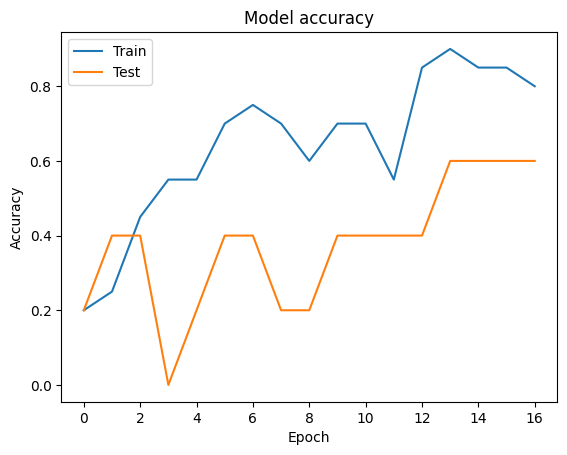

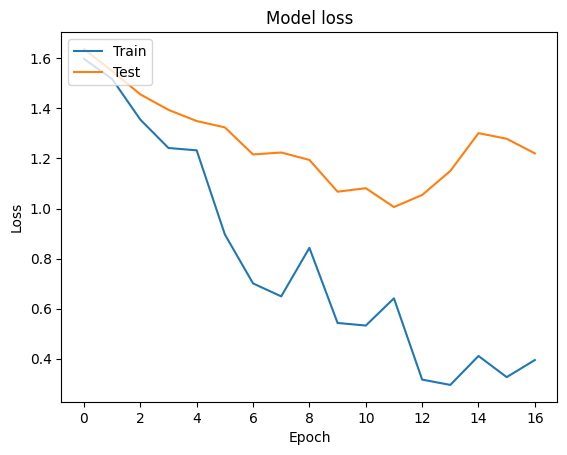

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_normalized = X / np.max(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
tf.keras.layers.Conv1D(64, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(pool_size=2),
tf.keras.layers.Conv1D(128, 5, activation='relu'),
tf.keras.layers.MaxPooling1D(pool_size=2),
tf.keras.layers.Conv1D(256, 3, activation='relu'),
tf.keras.layers.MaxPooling1D(pool_size=2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict, callbacks=callbacks)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()